In [30]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from fancyimpute import KNN 
import seaborn as sns


data = pd.read_excel('lab4Kucheriaviy.xlsm')
data.head()

,First name,Last name,country,car make,car model year
0,Karlotte,Dilgarno,Tunisia,Suzuki,NaN
1,Jelene,Sayburn,China,Jeep,2008.0
2,Linell,Runham,Bosnia and Herzegovina,Isuzu,NaN
3,Hilary,Braidwood,China,Ford,2004.0
4,Mariele,Gorringe,Russia,Acura,1990.0


In [31]:
nanToZero = data.fillna(0)
nanToZero.head()

,First name,Last name,country,car make,car model year
0,Karlotte,Dilgarno,Tunisia,Suzuki,0.0
1,Jelene,Sayburn,China,Jeep,2008.0
2,Linell,Runham,Bosnia and Herzegovina,Isuzu,0.0
3,Hilary,Braidwood,China,Ford,2004.0
4,Mariele,Gorringe,Russia,Acura,1990.0


In [32]:
nanToAVG = data.fillna(round(data['car model year'].mean()))
nanToAVG.head()

,First name,Last name,country,car make,car model year
0,Karlotte,Dilgarno,Tunisia,Suzuki,2000.0
1,Jelene,Sayburn,China,Jeep,2008.0
2,Linell,Runham,Bosnia and Herzegovina,Isuzu,2000.0
3,Hilary,Braidwood,China,Ford,2004.0
4,Mariele,Gorringe,Russia,Acura,1990.0


In [33]:
dataForRegresion = data.copy()

filedData = dataForRegresion[dataForRegresion['car model year'].notna()]
missedData = dataForRegresion[dataForRegresion['car model year'].isna()]

attrebutes = filedData[['car make', 'country']]
encodedAttributes = pd.get_dummies(attrebutes, columns=['car make', 'country'], drop_first=True)
values = filedData['car model year']

model = LinearRegression()
model.fit(encodedAttributes, values)

missingAttrebutes = missedData[['car make', 'country']]
missingAttrebutesEncoded = pd.get_dummies(missingAttrebutes, columns=['car make', 'country'], drop_first=True)
missingAttrebutesEncoded = missingAttrebutesEncoded.reindex(columns=encodedAttributes.columns, fill_value=0)
prediction = model.predict(missingAttrebutesEncoded)

dataForRegresion.loc[dataForRegresion['car model year'].isna(), 'car model year'] = np.round(prediction)
dataForRegresion.head()


,First name,Last name,country,car make,car model year
0,Karlotte,Dilgarno,Tunisia,Suzuki,2001.0
1,Jelene,Sayburn,China,Jeep,2008.0
2,Linell,Runham,Bosnia and Herzegovina,Isuzu,1986.0
3,Hilary,Braidwood,China,Ford,2004.0
4,Mariele,Gorringe,Russia,Acura,1990.0


In [34]:
data.head()

,First name,Last name,country,car make,car model year
0,Karlotte,Dilgarno,Tunisia,Suzuki,NaN
1,Jelene,Sayburn,China,Jeep,2008.0
2,Linell,Runham,Bosnia and Herzegovina,Isuzu,NaN
3,Hilary,Braidwood,China,Ford,2004.0
4,Mariele,Gorringe,Russia,Acura,1990.0


In [35]:
imputer = KNN(k=5)
encodedData = pd.get_dummies(data, drop_first=True)
iData = imputer.fit_transform(encodedData)
result = pd.DataFrame(iData, columns = encodedData.columns)
data.loc[:, 'car modelS year'] = result['car model year']
data.head()

Imputing row 1/1000 with 1 missing, elapsed time: 8.980
Imputing row 101/1000 with 0 missing, elapsed time: 8.981
Imputing row 201/1000 with 0 missing, elapsed time: 8.982
Imputing row 301/1000 with 0 missing, elapsed time: 8.982
Imputing row 401/1000 with 0 missing, elapsed time: 8.983
Imputing row 501/1000 with 0 missing, elapsed time: 8.984
Imputing row 601/1000 with 0 missing, elapsed time: 8.984
Imputing row 701/1000 with 0 missing, elapsed time: 8.984
Imputing row 801/1000 with 0 missing, elapsed time: 8.985
Imputing row 901/1000 with 0 missing, elapsed time: 8.985


,First name,Last name,country,car make,car model year,car modelS year
0,Karlotte,Dilgarno,Tunisia,Suzuki,NaN,2002.600035
1,Jelene,Sayburn,China,Jeep,2008.0,2008.000000
2,Linell,Runham,Bosnia and Herzegovina,Isuzu,NaN,2001.000035
3,Hilary,Braidwood,China,Ford,2004.0,2004.000000
4,Mariele,Gorringe,Russia,Acura,1990.0,1990.000000


<Axes: >

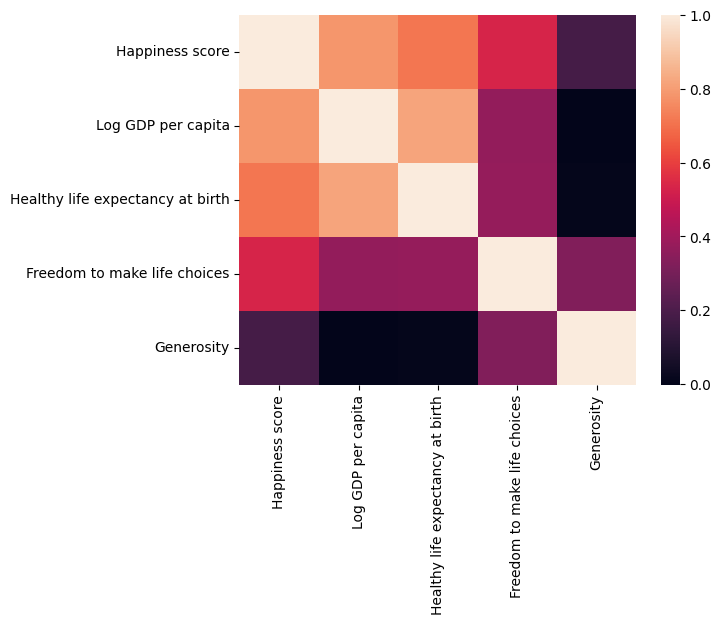

In [36]:
whr = pd.read_csv("whr.csv")
cr = whr[["Happiness score", "Log GDP per capita", "Healthy life expectancy at birth", "Freedom to make life choices", "Generosity"]].corr()
sns.heatmap(cr)

In [38]:
whr.describe()

,year,Happiness score,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2199.000000,2183.000000,2179.000000,2186.000000,2145.000000,2166.000000,2126.000000,2083.000000,2175.000000,2183.000000
mean,2014.161437,5.476563,9.389760,0.810681,63.294582,0.747847,0.000091,0.745208,0.652148,0.271493
std,4.718736,1.124685,1.153402,0.120953,6.901104,0.140137,0.161079,0.185835,0.105913,0.086872
min,2005.000000,1.281000,5.527000,0.228000,6.720000,0.258000,-0.338000,0.035000,0.179000,0.083000
25%,2010.000000,4.644000,8.500000,0.747000,59.120000,0.656250,-0.112000,0.688000,0.572000,0.208000
50%,2014.000000,5.428000,9.499000,0.836000,65.050000,0.770000,-0.023000,0.800000,0.663000,0.261000
75%,2018.000000,6.309000,10.373500,0.905000,68.500000,0.859000,0.092000,0.869000,0.738000,0.323000
max,2022.000000,8.019000,11.664000,0.987000,74.475000,0.985000,0.703000,0.983000,0.884000,0.705000
